In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
#import glob
#import os

def simple_pendulum_deriv(x, t, m, g, l): 
    """The simple pendulum subject to zero damping and zero control input

    Based on material from the MIT OCW subject "Underactuated Robotics"
    "lecture 2: the simple pendulum" given by Russell Tedrake, the 
    maths and some of the related diagrams are given at about 51 minutes
    in.
    """
    nx = np.zeros(2)
    nx[0] = x[1]
    nx[1] = -(m * g * l * np.sin(x[0])) 
    return nx

def plot_orbit( x0 ):
    """Plot the phase space of the pendulum

    """
    # Pick ts to be sufficiently large (by inspection) to make sure
    # that all of the cases of interest will have reached their 
    # homoclinic orbit
    ts = np.linspace(0.0, 50.0, 1001)
    ys = odeint(simple_pendulum_deriv, x0, ts, args = (1.0, 9.8, 1.0))
    plt.plot(ys[:,0], ys[:,1])

def pendulum_video( q0, ts, output_file):
    ts = np.linspace(0.0, 5.0, 101)
    qs = odeint(simple_pendulum_deriv, q0, ts, args = (1.0, 9.8, 1.0))
    pendulum_video_sequence(qs, output_file)

def plot_pendulum(q, length = 1.0):
    xs = [  0.0,  length * np.sin(q[0]) ]
    ys = [  0.0, -length * np.cos(q[0]) ]
    plt.plot( xs, ys, 'b-', linewidth = 3 )
    plt.plot( xs[1], ys[1], 'ro' )
    plt.gca().set_xlim([-1.2, 1.2])
    plt.gca().set_ylim([-1.2, 1.2])
    plt.gca().set_aspect('equal')

#def encode_video(input_pattern, output_filename):
#    # taken (almost) directly from the matplotlib website:
#    # http://matplotlib.sourceforge.net/faq/howto_faq.html#make-a-movie
#    os.system("mencoder 'mf://%s' -mf type=png:fps=10 -ovc lavc -lavcopts vcodec

#def pendulum_video_sequence(qs, output_filename):
#    for n, q in enumerate(qs):
#        print n, q
#       plt.clf()
#        plot_pendulum( q )
##        plt.savefig( '_tmp%03d.png' % n )
#    encode_video('_tmp*.png', output_filename)
#    for fname in glob.glob('_tmp*.png'):
#        os.remove(fname)

def plot_interesting_orbits():
    plt.clf()
    # start with zero velocity at a number of differing angles
    # scipy odeint does some pretty weird things if you have enough
    # velocity to loop around
    plot_orbit(np.array([np.pi * 0.25, 0.0]))
    plot_orbit(np.array([np.pi * 0.5, 0.0]))
    plot_orbit(np.array([np.pi * 0.9, 0.0]))
    plot_orbit(np.array([np.pi * 0.999, 0.0]))
    plt.title('homoclinic orbits for an undamped simpled pendulum')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\dot{\theta}$')
    plt.show()

def interesting_videos():
    ts = np.linspace(0.0, 50.0, 501)
    pendulum_video( np.array([np.pi/2.0, 0.0]), ts, 'undamped_simple_pendulum01.mp4' )
    pendulum_video( np.array([3*np.pi/4.0, 0.0]), ts, 'undamped_simple_pendulum02.mp4' )


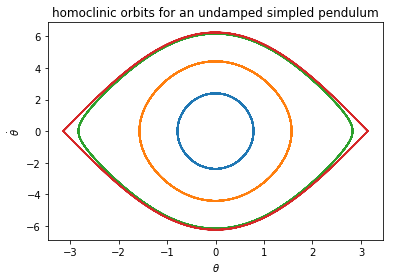

In [2]:
plot_interesting_orbits()


In [5]:
ts = np.linspace(0.0, 5.0, 101)
q0=np.array([np.pi/2.0, 0.0])

In [6]:
qs = odeint(simple_pendulum_deriv, q0, ts, args = (1.0, 9.8, 1.0))

In [20]:
qs[2,1]



-0.97976467204083817

for n, q in enumerate(qs):
    print n, q
    plt.clf()
    plot_pendulum( q )


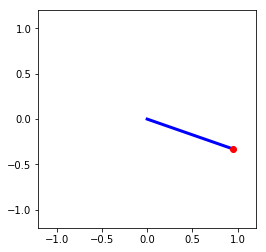

In [13]:
plt.show()
